# Sentimet Analysis

Demo tutorial for how to use nlp_toolkit to train classification model and predict new samples. The task we choose is sentiment binary classification.

The dataset is crawled from Kanzhun.com and Dajie.com, which is about company pros and cons.

Available models:
    1. Bi-LSTM Attention
    2. Multi Head Self Attention
    3. TextCNN
    4. DPCNN

In [1]:
from nlp_toolkit import Dataset, Classifier

/opt/wangyilei/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
2018-12-18 23:35:27,866 - __init__.py[line:24] - INFO: Choose the most free GPU: 0, currently not support multi-gpus


## Data Processing

### Load config dict

In [2]:
import yaml
config = yaml.load(open('../config_classification.yaml'))
config['data']['basic_token'] = 'word'
config['embed']['pre'] = True
config['embed']['word']['path'] = '../data/embeddings/tencent_np_200d.txt'

### Load Data

In [3]:
dataset = Dataset(fname='../data/company_pro_con_new.txt', task_type='classification', mode='train', config=config)

2018-12-18 20:59:01,032 - data.py[line:155] - INFO: data loaded
2018-12-18 20:59:01,966 - data.py[line:263] - INFO: transformer fitting complete
2018-12-18 20:59:07,170 - utilities.py[line:254] - INFO: OOV rate: 0.27 %
2018-12-18 20:59:07,201 - data.py[line:269] - INFO: Loaded Pre_trained Embeddings


In [4]:
for x, y in zip(dataset.texts['token'][0:10], dataset.labels[0:10]):
    print(x, y)

['进去', '前', '许诺', '的', '工资', '给', '的', '高', 8] ['pos']
['校园', '环境', '优美', '，', '美女', '很多', '，', '适合', '居住', '，', '食堂', '饭菜', '便宜', '，', '操场', '好', '，', '可以', '天天', '运动', 20] ['pos']
['老板', '人', '很好', '老', '员工', '会', '各种', '教', '你', '东西', '，', '而且', '不会', '有所', '保留', '薪水', '在', '大连', '还', '算', '可以', 21] ['pos']
['人员', '比较', '多', '，', '复杂', '办公室', '容易', '形成', '拉帮结派', '不利于', '企业', '发展', 12] ['neg']
['出差', '太多', '了', '。', '在', '现场', '开发', '很苦', '逼', '。', 10] ['neg']
['公司', '目前', '地理位置', '不', '太', '理想', '，', '离', '城市', '中心', '较', '远点', '。', 13] ['neg']
['公司', '的', '技术', '水平', '国内', '顶尖', '，', '十几', '年', '的', '资历', '，', '制作', '的', '作品', '几乎', '都', '是', '精品', '，', '参与', '过', '很多', '知名', '项目', '。', 26] ['pos']
['工作', '流程', '复杂', '个人', '上升', '空间', '有限', '新产品', '的', '创新', '能力', '有限', '组织', '架构', '稍', '显', '臃肿', 17] ['neg']
['无偿', '加班', '，', '加班', '多', '，', '没', '加班费', '，', '压力', '很大', 11] ['neg']
['环境', '比较', '轻松', '，', '跟', '项目', '走', '，', '能', '学', '不少', '专业', '知识', '，', '经验', '很', '重要', 17] [

if your want to see the vocab and label index mapping dict

In [5]:
# dataset.transformer._word_vocab._token2id

In [6]:
# dataset.transformer._label_vocab._token2id

In [7]:
transformer = dataset.transformer

## Classifier Training

### Define classifier

avialiable models: model_name_list = ['dpcnn', 'text_cnn', 'bi_lstm_att', 'multi_head_self_att']

In [4]:
model_name='transformer'

In [8]:
# if you want to get attention weights during prediction, please set return_attention=True, only for bi_lstm_att model
# config['model'][model_name]['return_att'] = True
# text_cnn and dpcnn currently not support bucket sequence type
text_classifier = Classifier(model_name=model_name, dataset=dataset, seq_type='bucket')

### Train Model

In [9]:
trained_model, history = text_classifier.train()

2018-12-18 20:11:21,154 - trainer.py[line:123] - INFO: transformer model structure...
2018-12-18 20:11:21,201 - trainer.py[line:135] - INFO: train/valid set: 75708/18927
2018-12-18 20:11:21,202 - trainer.py[line:92] - INFO: use bucket sequence to speed up model training
2018-12-18 20:11:21,211 - sequence.py[line:355] - INFO: Training with 99 non-empty buckets


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
token (InputLayer)              (None, None)         0                                            
__________________________________________________________________________________________________
token_embeddings (Embedding)    (None, None, 200)    4888400     token[0][0]                      
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, None, 200)    0           token_embeddings[0][0]           
__________________________________________________________________________________________________
position_embedding (Position_Em (None, None, 200)    0           spatial_dropout1d_1[0][0]        
__________________________________________________________________________________________________
self_atten

2018-12-18 20:11:21,406 - sequence.py[line:355] - INFO: Training with 99 non-empty buckets


mointor training process using f1 score
Successfully made a directory: models/transformer_201812182011
using Early Stopping
using Reduce LR On Plateau
tracking loss history and metrics


2018-12-18 20:11:21,753 - trainer.py[line:167] - INFO: saving model parameters and transformer to models/transformer_201812182011


model hyperparameters:
 {'nb_classes': 2, 'nb_tokens': 24442, 'maxlen': None, 'nb_head': 8, 'head_size': 16, 'embedding_dim': 200, 'nb_transformer': 2, 'pos_embed': True, 'final_dropout_rate': 0.5, 'embed_dropout_rate': 0.15}
Epoch 1/25
1235/1235 [==============================] - 12s 10ms/step - loss: 0.4311 - acc: 0.8585 - val_loss: 0.2729 - val_acc: 0.9100
pos - f1: 90.80
neg - f1: 89.48

Epoch 00001: f1 improved from -inf to 0.90172, saving model to models/transformer_201812182011/model_weights_01_0.9100_0.9017.h5
Epoch 2/25
1235/1235 [==============================] - 11s 9ms/step - loss: 0.2711 - acc: 0.9097 - val_loss: 0.2660 - val_acc: 0.9104
pos - f1: 91.72
neg - f1: 91.02

Epoch 00002: f1 improved from 0.90172 to 0.91393, saving model to models/transformer_201812182011/model_weights_02_0.9104_0.9139.h5
Epoch 3/25
1235/1235 [==============================] - 11s 9ms/step - loss: 0.2388 - acc: 0.9227 - val_loss: 0.2380 - val_acc: 0.9193
pos - f1: 91.74
neg - f1: 91.50

Epoch 00

### plot acc and loss

In [10]:
from nlp_toolkit import visualization as vs

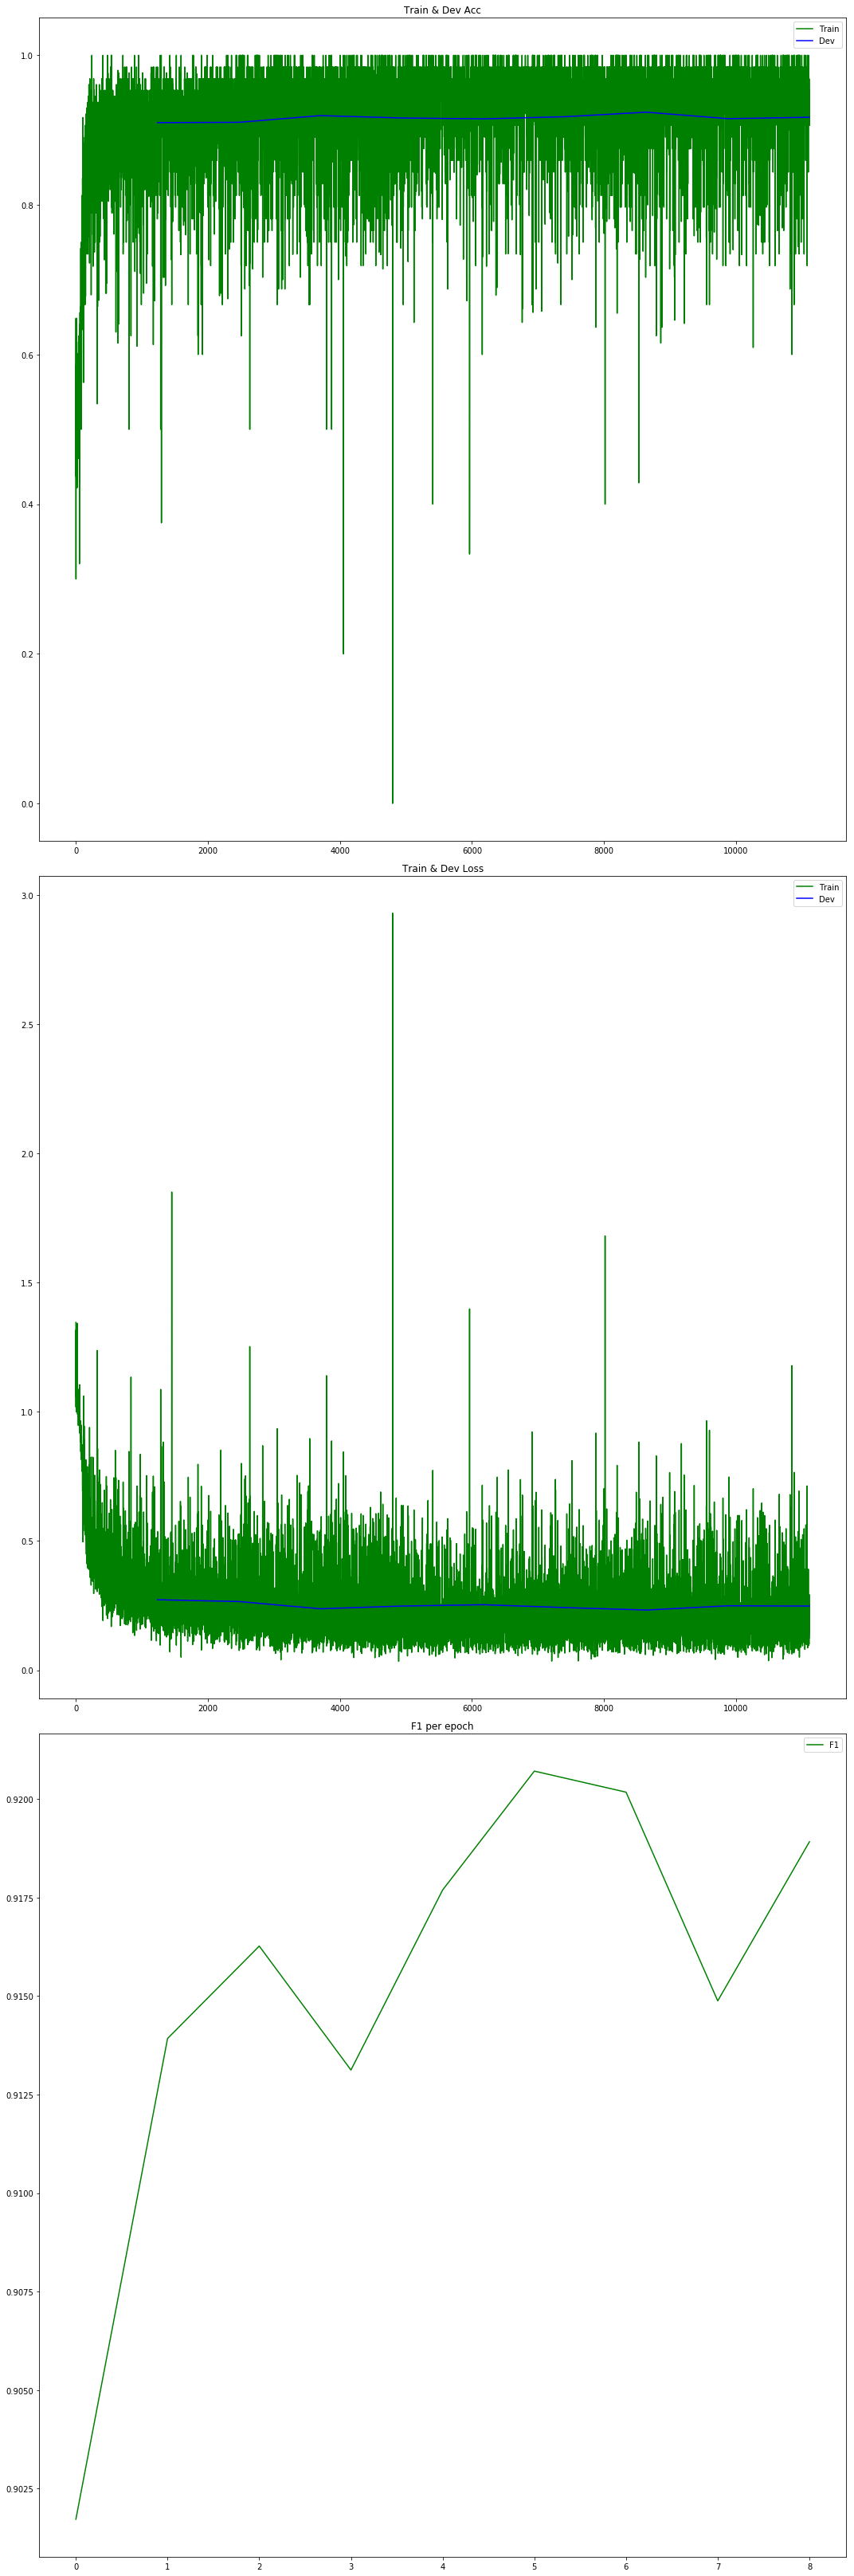

In [13]:
vs.plot_loss_acc(history, 'classification')

### 10-fold training

In [5]:
config['train']['train_mode'] = 'fold'
text_classifier_new = Classifier(model_name=model_name, dataset=dataset, seq_type='bucket')
text_classifier_new.train()

2018-12-18 20:59:08,543 - trainer.py[line:189] - INFO: 10-fold starts!



------------------------ fold 0------------------------


2018-12-18 20:59:08,892 - trainer.py[line:203] - INFO: transformer model structure...
2018-12-18 20:59:08,898 - trainer.py[line:93] - INFO: use bucket sequence to speed up model training
2018-12-18 20:59:08,907 - sequence.py[line:355] - INFO: Training with 99 non-empty buckets


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
token (InputLayer)              (None, None)         0                                            
__________________________________________________________________________________________________
token_embeddings (Embedding)    (None, None, 200)    4888400     token[0][0]                      
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, None, 200)    0           token_embeddings[0][0]           
__________________________________________________________________________________________________
position_embedding (Position_Em (None, None, 200)    0           spatial_dropout1d_1[0][0]        
__________________________________________________________________________________________________
self_atten

2018-12-18 20:59:09,110 - sequence.py[line:355] - INFO: Training with 96 non-empty buckets


mointor training process using f1 score
using Early Stopping
using Reduce LR On Plateau
tracking loss history and metrics
Epoch 1/25
1384/1384 [==============================] - 14s 10ms/step - loss: 0.4096 - acc: 0.8669 - val_loss: 0.2762 - val_acc: 0.9111
pos - f1: 91.19
neg - f1: 91.10
Epoch 2/25
1384/1384 [==============================] - 12s 9ms/step - loss: 0.2521 - acc: 0.9197 - val_loss: 0.2647 - val_acc: 0.9109
pos - f1: 91.20
neg - f1: 91.26
Epoch 3/25
1384/1384 [==============================] - 12s 9ms/step - loss: 0.2206 - acc: 0.9312 - val_loss: 0.2362 - val_acc: 0.9225
pos - f1: 92.43
neg - f1: 91.91
Epoch 4/25
1384/1384 [==============================] - 11s 8ms/step - loss: 0.2289 - acc: 0.9272 - val_loss: 0.2573 - val_acc: 0.9137
pos - f1: 91.41
neg - f1: 90.96
Epoch 5/25
1384/1384 [==============================] - 12s 9ms/step - loss: 0.1997 - acc: 0.9399 - val_loss: 0.2353 - val_acc: 0.9218
pos - f1: 92.78
neg - f1: 92.00
Epoch 6/25
1384/1384 [====================

2018-12-18 21:00:51,327 - trainer.py[line:93] - INFO: use bucket sequence to speed up model training
2018-12-18 21:00:51,334 - sequence.py[line:355] - INFO: Training with 99 non-empty buckets
2018-12-18 21:00:51,533 - sequence.py[line:355] - INFO: Training with 97 non-empty buckets


mointor training process using f1 score
using Early Stopping
using Reduce LR On Plateau
tracking loss history and metrics
Epoch 1/25
1383/1383 [==============================] - 12s 9ms/step - loss: 0.8946 - acc: 0.6842 - val_loss: 0.6798 - val_acc: 0.8421
pos - f1: 84.09
neg - f1: 82.49
Epoch 2/25
1383/1383 [==============================] - 13s 9ms/step - loss: 0.6854 - acc: 0.8384 - val_loss: 0.6399 - val_acc: 0.8556
pos - f1: 86.18
neg - f1: 85.01
Epoch 3/25
1383/1383 [==============================] - 12s 9ms/step - loss: 0.6479 - acc: 0.8551 - val_loss: 0.6181 - val_acc: 0.8654
pos - f1: 87.09
neg - f1: 85.63
Epoch 4/25
1383/1383 [==============================] - 13s 9ms/step - loss: 0.6189 - acc: 0.8655 - val_loss: 0.5884 - val_acc: 0.8746
pos - f1: 87.59
neg - f1: 87.02
Epoch 5/25
1383/1383 [==============================] - 13s 9ms/step - loss: 0.6012 - acc: 0.8703 - val_loss: 0.5640 - val_acc: 0.8850
pos - f1: 88.91
neg - f1: 87.96
Epoch 6/25
1383/1383 [=====================

2018-12-18 21:05:04,811 - trainer.py[line:93] - INFO: use bucket sequence to speed up model training
2018-12-18 21:05:04,818 - sequence.py[line:355] - INFO: Training with 99 non-empty buckets
2018-12-18 21:05:05,019 - sequence.py[line:355] - INFO: Training with 98 non-empty buckets


mointor training process using f1 score
using Early Stopping
using Reduce LR On Plateau
tracking loss history and metrics
Epoch 1/25
1383/1383 [==============================] - 14s 10ms/step - loss: 0.6904 - acc: 0.8379 - val_loss: 0.6058 - val_acc: 0.8795
pos - f1: 88.04
neg - f1: 87.29
Epoch 2/25
1383/1383 [==============================] - 13s 9ms/step - loss: 0.6437 - acc: 0.8555 - val_loss: 0.5836 - val_acc: 0.8820
pos - f1: 88.70
neg - f1: 88.22
Epoch 3/25
 410/1383 [=======>......................] - ETA: 8s - loss: 0.6093 - acc: 0.8724

KeyboardInterrupt: 

## Predict New Samples

## Load data and transformer

In [ ]:
dataset = Dataset(mode='predict', fname='../data/meituan_consulting_reviews_hanlp.txt',
                  task_type='classification',
                  tran_fname='models/bi_lstm_att_201812171626/transformer.h5')

## Load model

In [ ]:
text_classifier = Classifier('bi_lstm_att', dataset)
text_classifier.load(weight_fname='models/bi_lstm_att_201812171626/model_weights_06_0.8413_0.9384.h5',
                     para_fname='models/bi_lstm_att_201812171626/model_parameters.json')

## predict samples

In [ ]:
# if you want to get the label probability of each tokens, set return_prob as True
# currently only bi_lstm_att model supports return_attention, otherwise you will get errors
# if you don't want to use Dataset class to generate some other features or clean texts (not recommend)
# just make one fake dict with one key "token" and the value is the nested list of words
y_pred, attentions = text_classifier.predict(dataset.texts, return_prob=True, return_attention=True)

### attention visualization

currently only support for bi_lstm_att model

In [ ]:
vs.att2html(dataset.texts['token'][-1], attentions[-1])

<span style="background-color: #FFFEFE">公司</span> <span style="background-color: #FFFBFB">专业</span> <span style="background-color: #FFF9F9">技能</span> <span style="background-color: #FFEEEE">培训</span> <span style="background-color: #FFD5D5">机会</span> <span style="background-color: #FFE0E0">多</span> <span style="background-color: #FFF6F6">工作</span> <span style="background-color: #FFFCFC">，</span> <span style="background-color: #FFCFCF">能</span> <span style="background-color: #FFDBDB">使</span> <span style="background-color: #FFEAEA">自己</span> <span style="background-color: #FFEAEA">快速</span> <span style="background-color: #FFFEFE">提升</span> <span style="background-color: #FFFEFE">，</span> <span style="background-color: #FFFEFE">待遇</span> <span style="background-color: #FFF1F1">颇</span> <span style="background-color: #FFF7F7">丰</span>

<span style="background-color: #FFFEFE">老板</span> <span style="background-color: #FFFEFE">人</span> <span style="background-color: #FFD6D6">很好</span> <span style="background-color: #FFFCFC">老</span> <span style="background-color: #FFFEFE">员工</span> <span style="background-color: #FFFEFE">会</span> <span style="background-color: #FFFBFB">各种</span> <span style="background-color: #FFD3D3">教</span> <span style="background-color: #FFD7D7">你</span> <span style="background-color: #FFECEC">东西</span> <span style="background-color: #FFFCFC">，</span> <span style="background-color: #FFFEFE">而且</span> <span style="background-color: #FFD4D4">不会</span> <span style="background-color: #FFFEFE">有所</span> <span style="background-color: #FFFEFE">保留</span> <span style="background-color: #FFFEFE">薪水</span> <span style="background-color: #FFFEFE">在</span> <span style="background-color: #FFFEFE">大连</span> <span style="background-color: #FFFEFE">还</span> <span style="background-color: #FFEDED">算</span> <span style="background-color: #FFD5D5">可以</span><br><br>

 <span style="background-color: #FF8989">很好</span> <span style="background-color: #FFB0B0">，</span> <span style="background-color: #FFDDDD">帮助</span> <span style="background-color: #FFE5E5">挺</span> <span style="background-color: #FFFEFE">大</span> <span style="background-color: #FFFEFE">的</span>

or you can write all results to html file and open it in a browser

In [ ]:
vs.attention_visualization(dataset.texts['token'], attentions, output_fname='result.html')

### Evaluate model

In [4]:
dataset = Dataset(mode='eval', fname='../data/company_pro_con_dev.txt',
                  task_type='classification',
                  tran_fname='models/bi_lstm_att_201812171626/transformer.h5')
text_classifier = Classifier('bi_lstm_att', dataset)
text_classifier.load(weight_fname='models/bi_lstm_att_201812171626/model_weights_06_0.8413_0.9384.h5',
                     para_fname='models/bi_lstm_att_201812171626/model_parameters.json')

# if you don't want to use Dataset class to generate some other features or clean texts (not recommend)
# just make one fake dict with one key "token" and the value is the nested list of words.
text_classifier.evaluate(dataset.texts, dataset.labels)

2018-12-18 23:37:50,775 - data.py[line:118] - INFO: transformer loaded
2018-12-18 23:37:51,011 - data.py[line:154] - INFO: data loaded


model loaded
             precision    recall  f1-score   support

        neg       0.96      1.00      0.98        51
        pos       1.00      0.96      0.98        49

avg / total       0.98      0.98      0.98       100

